## Programming Questions

### Q1. 
Create 1000 samples from a Gaussian distribution with mean -10 and standard deviation 5.
Create another 1000 samples from another independent Gaussian with mean 10 and standard
deviation 5.

a) Take the sum of these 2 Gaussians by adding the two sets of 1000 points, point by point,
and plot the histogram of the resulting 1000 points. What do you observe?

b) Estimate the mean and the variance of the sum.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Q1a
mu_0, sigma_0 = -10, 5
x_0 = np.random.normal(mu_0, sigma_0, 1000)

mu_1, sigma_1 = 10, 5
x_1 = np.random.normal(mu_1, sigma_1, 1000)

x_add = np.add(x_0, x_1)

In [3]:
# Q1b

# Mean of the sum
add = 0
for i in x_add:
    add += i
x_mean = add/len(x_add)

# Var of the sum
add = 0
for i in x_add:
    add += (i-x_mean)**2
x_var = add/len(x_add)

Mean of the sum:  0.37901723481787225 
 Variance of the sum:  52.99105291659517


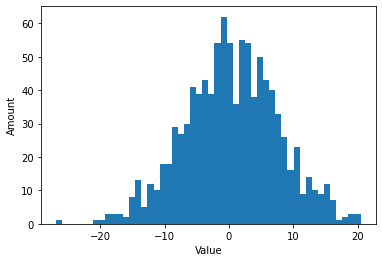

In [4]:
print("Mean of the sum: ", x_mean, "\n Variance of the sum: ", x_var)
plt.hist(x_add, bins = 20)
plt.xlabel('Value')
plt.ylabel('Amount')
plt.show()

### Q2.
Let Xi be an iid Bernoulli random variable with value {-1,1}. Look at the random variable $Z_n = \frac{1}{\sqrt n} \sum_{}^{}X_i$. By taking 1000 draws from Zn, plot its histogram. Check that for small n (say, 5-10) Zn does not look that much like a Gaussian, but when n is bigger (already by the time n = 30 or 50) it looks much more like a Gaussian.Check also for much bigger n: n = 250, to see that at this point, one can really see the bell curve.

In [5]:
# Q2
from scipy import stats
import math

In [11]:
def getZnArray(n):
    # n is the number of bernoulli variables we make
    ZnArray = []
    for j in range(1000):
        add = 0
        bernRVs = stats.bernoulli.rvs(.5, size = n)
        for i in bernRVs:
            if i != 1:
                i = -1
            add += i
        Zn = add/math.sqrt(n)
        ZnArray.append(Zn)
    return ZnArray

In [18]:
def ZnPlot(array):
    plt.hist(array, bins = 20)
    plt.xlabel('Zn Value')
    plt.xlabel('Amount')
    plt.show()

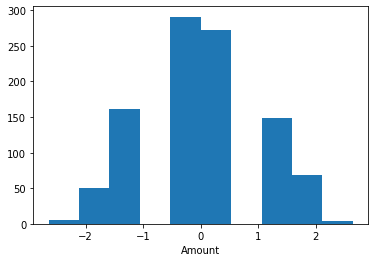

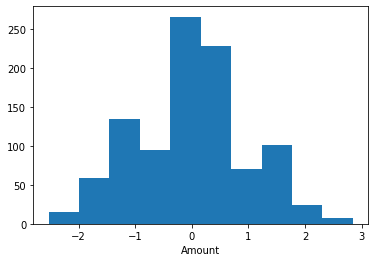

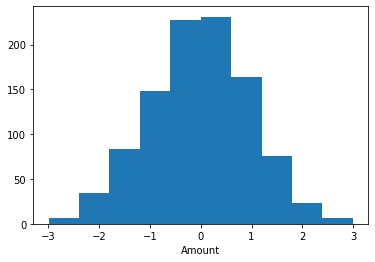

In [19]:
# Q2a - small amount (7)
sm = getZnArray(7)
ZnPlot(sm)

# Q2b - medium amount (40)
med = getZnArray(40)
ZnPlot(med)

# Q2c - large amount (1300)
lg = getZnArray(1300)
ZnPlot(lg)

Note: In the problem statement it says to see how as n grows larger (number of iid bernoulli variables) Zn should look more and more like a gaussian, however the two smaller n values actually seem to have greater similarity to a gaussian than the large n value when plotted with more bins than default (50). In fact as we increase bin amount from defualt (10) the above point happens with greater disparity i.e. 50 bins is worse than 20 is worse than 10.

## Written Questions

### Q3. 
Consider a coin such that probability of heads is 2/3. Suppose you toss the coin 100 times. Estimate the probability of getting 50 or fewer heads. You can do this in a variety of ways. One way is to use the Central Limit Theorem. Be explicit in your calculations and tell us what tools you are using in these.

Lets first start with a smaller case to work with, flipping 10 coins. Chance of getting 0 heads is $(\frac 2 3)^0 * (\frac 1 3)^{10}$ since getting 0 heads means getting 10 tails. Now let's look at the case of getting 9 tails (1 head). Similar to the case of 0 head we start with $(\frac 2 3)^1 * (\frac 1 3)^{9}$ which tells us one case for getting exactly 1 head and 9 tails. However, since any of the coins can be heads we have 10 cases where one coin gets head or also $10\choose1$. Note for 0 heads this would be $10\choose0$ or 1. In fact calculating getting an exact amount of heads is merely an RV with a binomial distribution - ${n\choose k}*p^k*(1-p)^{n-k}$. Now that we can calculate getting an exact amount of heads, summing them would get us the probabilty of getting x1 heads to x2 heads (CDF of the binomial RV). Since the problem asks for 50 or fewer heads, our x1 is 0 and x2 is 50. So the probability is ${P = \sum_{k=0}^{50}}{100\choose k}*(\frac 2 3)^k*(\frac 1 3)^{n-k}$.